In [ ]:
import os
import numpy as np
import itertools
import pandas as pd
from collections import OrderedDict
from scipy.special import comb
from statsmodels.stats.proportion import proportion_confint
import seaborn as sns
import matplotlib.pyplot as plt
#from math import comb
import glob
pd.set_option('display.expand_frame_repr', False)
np.set_printoptions(linewidth=1000)
pd.set_option("display.max_columns", None)
import matplotlib
from tqdm import tqdm
import math
#matplotlib.get_backend()
#matplotlib.use('module://backend_interagg')



In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
chain_motifs = pd.read_pickle('gdrive/My Drive/Allen Institute- Internship/Data/chain_motifs_og.pkl')

In [ ]:
assembly_cells_in_chainMotifs = pd.read_pickle('gdrive/My Drive/Allen Institute- Internship/Downloads/Data/assembly_cells_chain.pkl')

#MOTIFS WITH MORE THAN ONE NEURON BEING IN AN ASSEMBLY

In [ ]:
assembly_cells_in_chainMotifs

,motif_type,motif_cells,neu_cat0,neu_cat1,neu_cat2,cell_types,assembly_cell_id
56150,chain,"[149, 39, 487]",149,39,487,"[PYC-23, PYC-23, PYC-23]",149
56151,chain,"[149, 53, 487]",149,53,487,"[PYC-23, PYC-23, PYC-23]",149
56152,chain,"[149, 77, 487]",149,77,487,"[PYC-23, PYC-23, PYC-23]",149
56153,chain,"[149, 267, 487]",149,267,487,"[PYC-23, PYC-23, PYC-23]",149
56154,chain,"[149, 329, 487]",149,329,487,"[PYC-23, PYC-23, PYC-23]",149
...,...,...,...,...,...,...,...
166076,chain,"[611, 493, 161]",611,493,161,"[BPC-23, PYC-23, PYC-23]",161
166148,chain,"[611, 509, 161]",611,509,161,"[BPC-23, PYC-23, PYC-23]",161
166220,chain,"[611, 535, 161]",611,535,161,"[BPC-23, PYC-23, PYC-23]",161
166292,chain,"[611, 539, 161]",611,539,161,"[BPC-23, PYC-23, PYC-23]",161


In [ ]:
#this checks that if for a cell starting position, are the other two cells also in an assembly
i_found = False
j_found = False
k_found = False
chain_probs = []
for i,j,k in zip(assembly_cells_in_chainMotifs['neu_cat0'],assembly_cells_in_chainMotifs['neu_cat1'],assembly_cells_in_chainMotifs['neu_cat2']):
  #print("i:", i)
  i_found = assembly_cells_in_chainMotifs.assembly_cell_id.apply(lambda x: i == x)
  j_found = assembly_cells_in_chainMotifs.assembly_cell_id.apply(lambda x: j == x)
  k_found = assembly_cells_in_chainMotifs.assembly_cell_id.apply(lambda x: k == x)

  if i_found.any()==True :
     if j_found.any() == True or k_found.any() == True:
        chain_probs.append(i)


In [ ]:
'''i_found = False
j_found = False
k_found = False
chain_probs_firstlast = []
for i,j,k in zip(assembly_cells_in_chainMotifs['neu_cat0'],assembly_cells_in_chainMotifs['neu_cat1'],assembly_cells_in_chainMotifs['neu_cat2']):
  #print("i:", i)
  i_found = assembly_cells_in_chainMotifs.assembly_cell_id.apply(lambda x: i == x)
  j_found = assembly_cells_in_chainMotifs.assembly_cell_id.apply(lambda x: j == x)
  k_found = assembly_cells_in_chainMotifs.assembly_cell_id.apply(lambda x: k == x)

  if j_found.any() == True or k_found.any() == True:
    if i_found.any()==True :
        chain_probs_firstlast.append(i)'''

In [ ]:
chains_cat0['id'] = pd.DataFrame(chain_probs)   #total assembly cells(neu_cat0) in a motif with other assembly cells

In [ ]:
values_chains_cat0 = chains_cat0['id'].unique()
assembly_cells_filtered = assembly_cells_in_chainMotifs[assembly_cells_in_chainMotifs['assembly_cell_id'].isin(values_chains_cat0)]   #find those cat0 cells in the total assembly cell chain motifs

In [ ]:
assembly_cells_filtered

,motif_type,motif_cells,neu_cat0,neu_cat1,neu_cat2,cell_types,assembly_cell_id
56150,chain,"[149, 39, 487]",149,39,487,"[PYC-23, PYC-23, PYC-23]",149
56151,chain,"[149, 53, 487]",149,53,487,"[PYC-23, PYC-23, PYC-23]",149
56152,chain,"[149, 77, 487]",149,77,487,"[PYC-23, PYC-23, PYC-23]",149
56153,chain,"[149, 267, 487]",149,267,487,"[PYC-23, PYC-23, PYC-23]",149
56154,chain,"[149, 329, 487]",149,329,487,"[PYC-23, PYC-23, PYC-23]",149
...,...,...,...,...,...,...,...
166076,chain,"[611, 493, 161]",611,493,161,"[BPC-23, PYC-23, PYC-23]",161
166148,chain,"[611, 509, 161]",611,509,161,"[BPC-23, PYC-23, PYC-23]",161
166220,chain,"[611, 535, 161]",611,535,161,"[BPC-23, PYC-23, PYC-23]",161
166292,chain,"[611, 539, 161]",611,539,161,"[BPC-23, PYC-23, PYC-23]",161


In [ ]:
count_chain_cat0 = chains_cat0['id'].value_counts() #no. of times a given assembly cell is in a motif with other assembly cell

In [ ]:
matching_values = assembly_cells_filtered['assembly_cell_id'].value_counts()      #total motifs formed by those(given assembly cell is in a motif with other assembly cell) cells

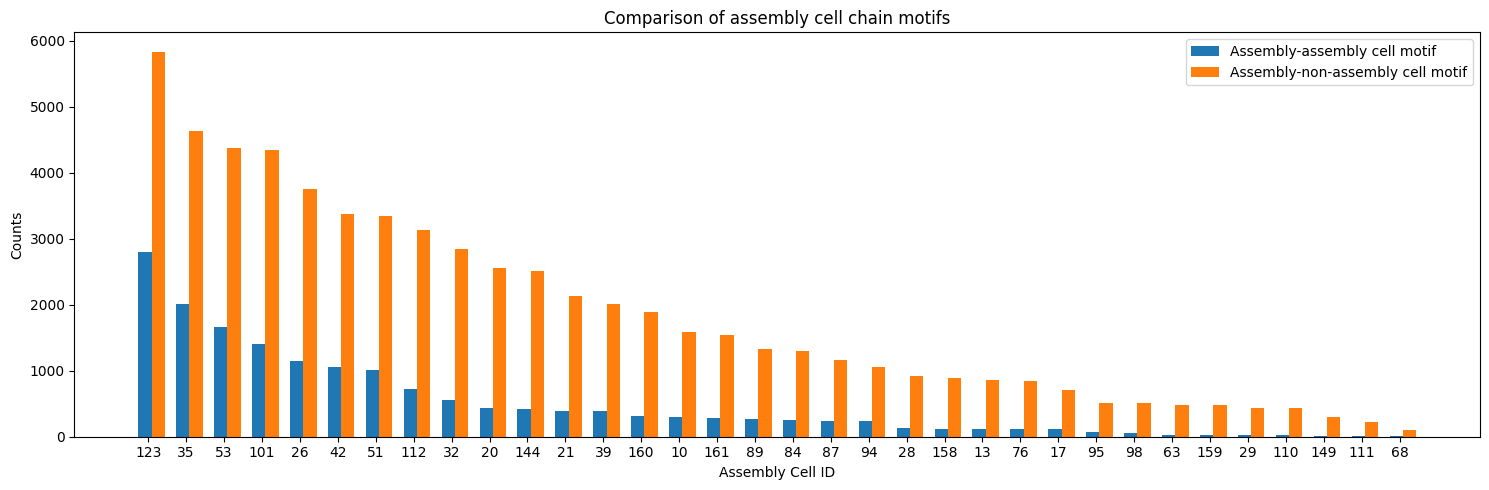

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))

# Set the width of the bars
bar_width = 0.35

# Set the positions for the bars
x = np.arange(len(count_chain_cat0))

# Plot bars for DataFrame 1
ax.bar(x, count_chain_cat0, bar_width, label='Assembly-assembly cell motif')

# Plot bars for DataFrame 2
ax.bar([i + bar_width for i in x], matching_values, width = 0.35, label='Assembly-non-assembly cell motif')

# Set the labels, title, and legend
ax.set_xlabel('Assembly Cell ID')
ax.set_ylabel('Counts')
ax.set_title('Comparison of assembly cell chain motifs')
ax.set_xticks([i + bar_width/4 for i in x])
ax.set_xticklabels(count_chain_cat0.index)
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
prob_repeat = []  #probability of being in a motif with other assembly  cell
for i,j in zip(count_chain_cat0,matching_values):
  k = i/j
  prob_repeat.append(k)

In [ ]:
df = pd.DataFrame()
repeat_motif = pd.DataFrame(prob_repeat)

df['motif_with_assembly_cells'] = repeat_motif
df['assembly_id'] = values_chains_cat0

<ipython-input-78-3299a118a518>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df['assembly_id'], rotation = 90)


[Text(0, 0, '149'),
 Text(1, 0, '89'),
 Text(2, 0, '10'),
 Text(3, 0, '87'),
 Text(4, 0, '110'),
 Text(5, 0, '159'),
 Text(6, 0, '42'),
 Text(7, 0, '76'),
 Text(8, 0, '112'),
 Text(9, 0, '17'),
 Text(10, 0, '39'),
 Text(11, 0, '123'),
 Text(12, 0, '53'),
 Text(13, 0, '68'),
 Text(14, 0, '144'),
 Text(15, 0, '32'),
 Text(16, 0, '95'),
 Text(17, 0, '94'),
 Text(18, 0, '13'),
 Text(19, 0, '63'),
 Text(20, 0, '51'),
 Text(21, 0, '35'),
 Text(22, 0, '160'),
 Text(23, 0, '29'),
 Text(24, 0, '26'),
 Text(25, 0, '84'),
 Text(26, 0, '98'),
 Text(27, 0, '101'),
 Text(28, 0, '28'),
 Text(29, 0, '161'),
 Text(30, 0, '158'),
 Text(31, 0, '20'),
 Text(32, 0, '21'),
 Text(33, 0, '111')]

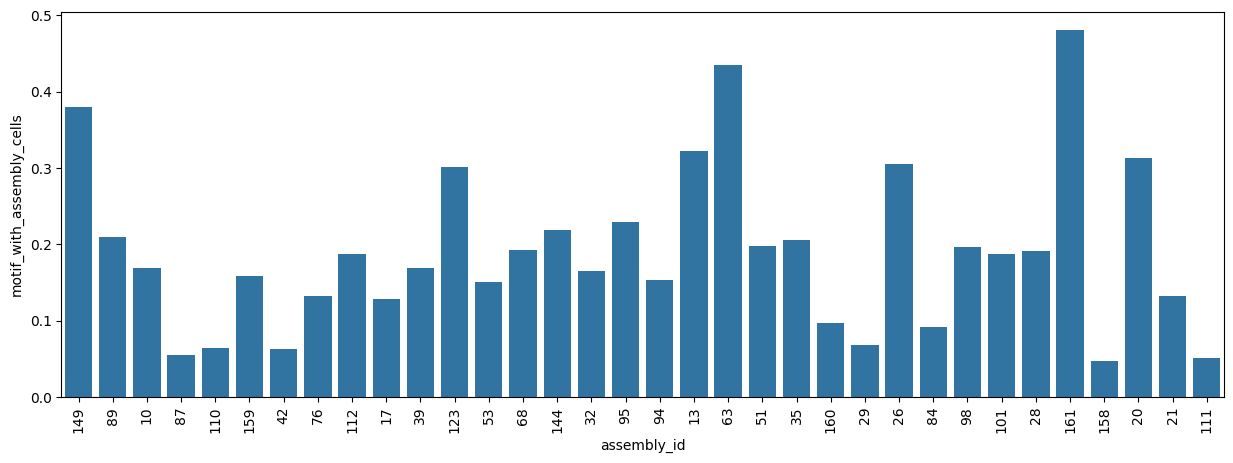

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.barplot(df, x="assembly_id", y="motif_with_assembly_cells")
ax.set_xticklabels(df['assembly_id'], rotation = 90)

In [ ]:
np.size(assembly_cells_in_chainMotifs['assembly_cell_id'].unique())

57

In [ ]:
np.size(values_chains_cat0)

34

In [ ]:
34/57

0.5964912280701754